## CARGAMOS LAS BASES DE DATOS
Clases:
- Cargar bases de datos JSON, BASE 64
- Cargar bases de datos CSV
- Preprocesamiento de datos

In [ ]:
import os
import zipfile

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2021-09-20 17:29:37--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  28.3MB/s    in 2.4s    

2021-09-20 17:29:40 (28.3 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [ ]:
# Descomprimimos 
local_zip = '/tmp/databasesLoadData.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/databasesLoadData')
zip_ref.close()

In [ ]:
import json
import codecs
import requests
import numpy as np
from PIL import Image
from io import BytesIO
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [ ]:
data_json = []
with codecs.open(url, 'rU','utf-8') as js:
  for line in js:
    data_json.append(json.loads(line))


print("{} imagenes encontradas".format(len(data_json)) )

9 imagenes encontradas


In [ ]:
data_json[0]

{'content': 'https://storage.googleapis.com/platzi-tf2/img_mnist/29_B.jpg',
 'label': 'b'}

In [ ]:
images = []

for data in data_json:
  response = requests.get(data['content'])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data["label"]])

b


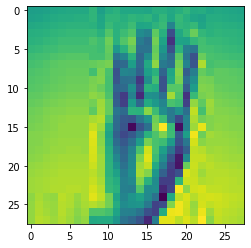

In [ ]:
plt.imshow(images[0][0].reshape(28, 28))
print(images[0][1])

In [ ]:
import base64

In [ ]:
url = "/tmp/databasesLoadData/sign_mnist_base64/data.json"

In [ ]:
with open(url) as f:
  data = json.load(f)


In [ ]:
print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [ ]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = "/tmp/decoded_images.png"
with open(path_img, "wb") as file_to_save:
  decoded_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decoded_image_data)

In [ ]:
img = Image.open(path_img)
img

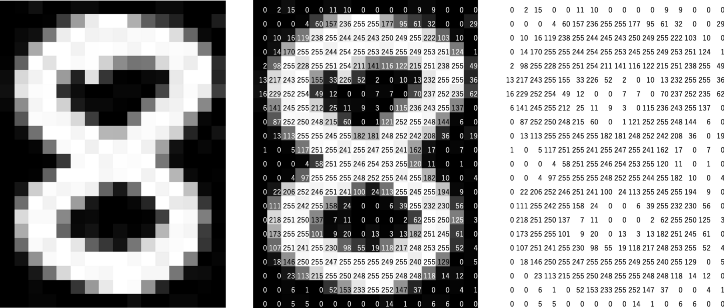

In [ ]:
img = Image.open("/tmp/databasesLoadData/pixeles.png")
img

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [ ]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train.shape

(27455, 785)

In [ ]:
labels = train['label'].values

In [ ]:
train.drop('label', axis = 1, inplace = True)

In [ ]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
images = train.values

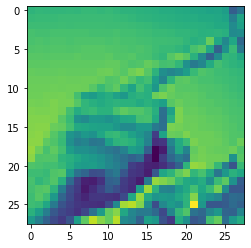

In [ ]:
plt.imshow(images[1].reshape(28, 28))

In [ ]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


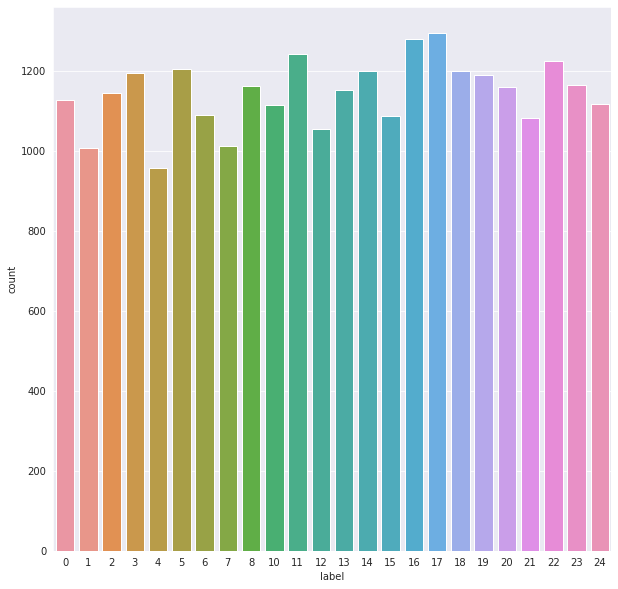

In [ ]:
plt.figure(figsize = (10, 10))
sns.set_style("darkgrid")
sns.countplot(train["label"])

In [ ]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


In [ ]:
train.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

In [ ]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
train.isnull().values.any()

False

In [ ]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [ ]:
train = train.drop([317,487, 595, 689, 802, 861], axis = 0)

In [ ]:
train[train['pixel1'] == "fwefew"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [ ]:
train = train.drop([727], axis = 0)

In [ ]:
train = train.astype(str).astype(int)

In [ ]:
train = train / 255
test = test / 255

In [ ]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,0.619608,0.627451,0.639216,0.647059,0.623529,0.650980,0.658824,0.666667,0.666667,0.670588,0.670588,0.670588,0.674510,0.670588,0.670588,0.666667,0.666667,0.662745,0.435294,0.474510,0.505882,0.529412,0.552941,0.564706,0.580392,0.592157,0.603922,0.615686,0.627451,0.639216,...,0.803922,0.807843,0.807843,0.811765,0.811765,0.807843,0.807843,0.800000,0.803922,0.800000,0.796078,0.792157,0.556863,0.592157,0.627451,0.674510,0.768627,0.737255,0.737255,0.745098,0.529412,0.376471,0.337255,0.301961,0.301961,0.309804,0.690196,0.803922,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,0.619608,0.611765,0.603922,0.603922,0.600000,0.596078,0.592157,0.584314,0.584314,0.580392,0.576471,0.572549,0.564706,0.556863,0.560784,0.541176,0.360784,0.423529,0.619608,0.623529,0.623529,0.623529,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.627451,0.623529,...,0.392157,0.305882,0.470588,0.615686,0.658824,0.419608,0.388235,0.474510,0.521569,0.380392,0.372549,0.470588,0.529412,0.454902,0.372549,0.309804,0.270588,0.337255,0.545098,0.678431,0.784314,0.725490,0.686275,0.776471,0.486275,0.462745,0.368627,0.549020,0.521569,0.329412,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,0.725490,0.725490,0.725490,0.721569,0.721569,0.721569,0.709804,0.709804,0.701961,0.701961,0.701961,0.698039,0.698039,0.427451,0.203922,0.258824,0.301961,0.325490,0.737255,0.741176,0.741176,0.737255,0.737255,0.741176,0.737255,0.737255,0.737255,0.737255,0.733333,0.725490,...,0.796078,0.800000,0.796078,0.788235,0.784314,0.784314,0.780392,0.776471,0.768627,0.764706,0.760784,0.756863,0.776471,0.650980,0.517647,0.447059,0.349020,0.290196,0.309804,0.301961,0.290196,0.305882,0.517647,0.737255,0.823529,0.819608,0.807843,0.803922,0.800000,0.796078,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,0.819608,0.811765,0.815686,0.811765,0.807843,0.796078,0.792157,0.788235,0.784314,0.776471,0.772549,0.764706,0.752941,0.772549,0.670588,0.200000,0.203922,0.211765,0.831373,0.835294,0.843137,0.843137,0.831373,0.831373,0.835294,0.831373,0.831373,0.827451,0.827451,0.819608,...,0.968627,0.949020,0.913725,0.905882,0.901961,0.898039,0.890196,0.882353,0.874510,0.866667,0.862745,0.847059,0.227451,0.200000,0.192157,0.196078,0.223529,0.235294,0.066667,0.058824,0.070588,0.066667,0.074510,0.003922,0.623529,1.000000,0.929412,0.937255,0.929412,0.925490,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,0.737255,0.741176,0.741176,0.745098,0.749020,0.741176,0.745098,0.745098,0.733333,0.745098,0.752941,0.756863,0.749020,0.749020,0.752941,0.752941,0.760784,0.760784,0.650980,0.662745,0.674510,0.682353,0.694118,0.705882,0.713725,0.725490,0.729412,0.733333,0.745098,0.749020,...,0.352941,0.301961,0.345098,0.458824,0.482353,0.498039,

## ¿Con qué otros formatos has trabajado? 
Escribe en los comentarios GeoJson, STL, txt.